In [ ]:
# downloading dataset directlt from kaggle
!pip install kaggle
!kaggle datasets download -d safabouguezzi/german-traffic-sign-detection-benchmark-gtsdb
!unzip german-traffic-sign-detection-benchmark-gtsdb.zip -d /content/dataset

Dataset URL: https://www.kaggle.com/datasets/safabouguezzi/german-traffic-sign-detection-benchmark-gtsdb
License(s): unknown
100% 1.61G/1.61G [01:09<00:00, 29.1MB/s]
100% 1.61G/1.61G [01:09<00:00, 24.9MB/s]
Archive:  german-traffic-sign-detection-benchmark-gtsdb.zip
  inflating: /content/dataset/TestIJCNN2013/TestIJCNN2013Download/00000.ppm  
  inflating: /content/dataset/TestIJCNN2013/TestIJCNN2013Download/00001.ppm  
  inflating: /content/dataset/TestIJCNN2013/TestIJCNN2013Download/00002.ppm  
  inflating: /content/dataset/TestIJCNN2013/TestIJCNN2013Download/00003.ppm  
  inflating: /content/dataset/TestIJCNN2013/TestIJCNN2013Download/00004.ppm  
  inflating: /content/dataset/TestIJCNN2013/TestIJCNN2013Download/00005.ppm  
  inflating: /content/dataset/TestIJCNN2013/TestIJCNN2013Download/00006.ppm  
  inflating: /content/dataset/TestIJCNN2013/TestIJCNN2013Download/00007.ppm  
  inflating: /content/dataset/TestIJCNN2013/TestIJCNN2013Download/00008.ppm  
  inflating: /content/dataset/T

In [ ]:
# all the libraries used in the CNN
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from collections import Counter
from PIL import Image, ImageDraw
from sklearn.model_selection import train_test_split
import random

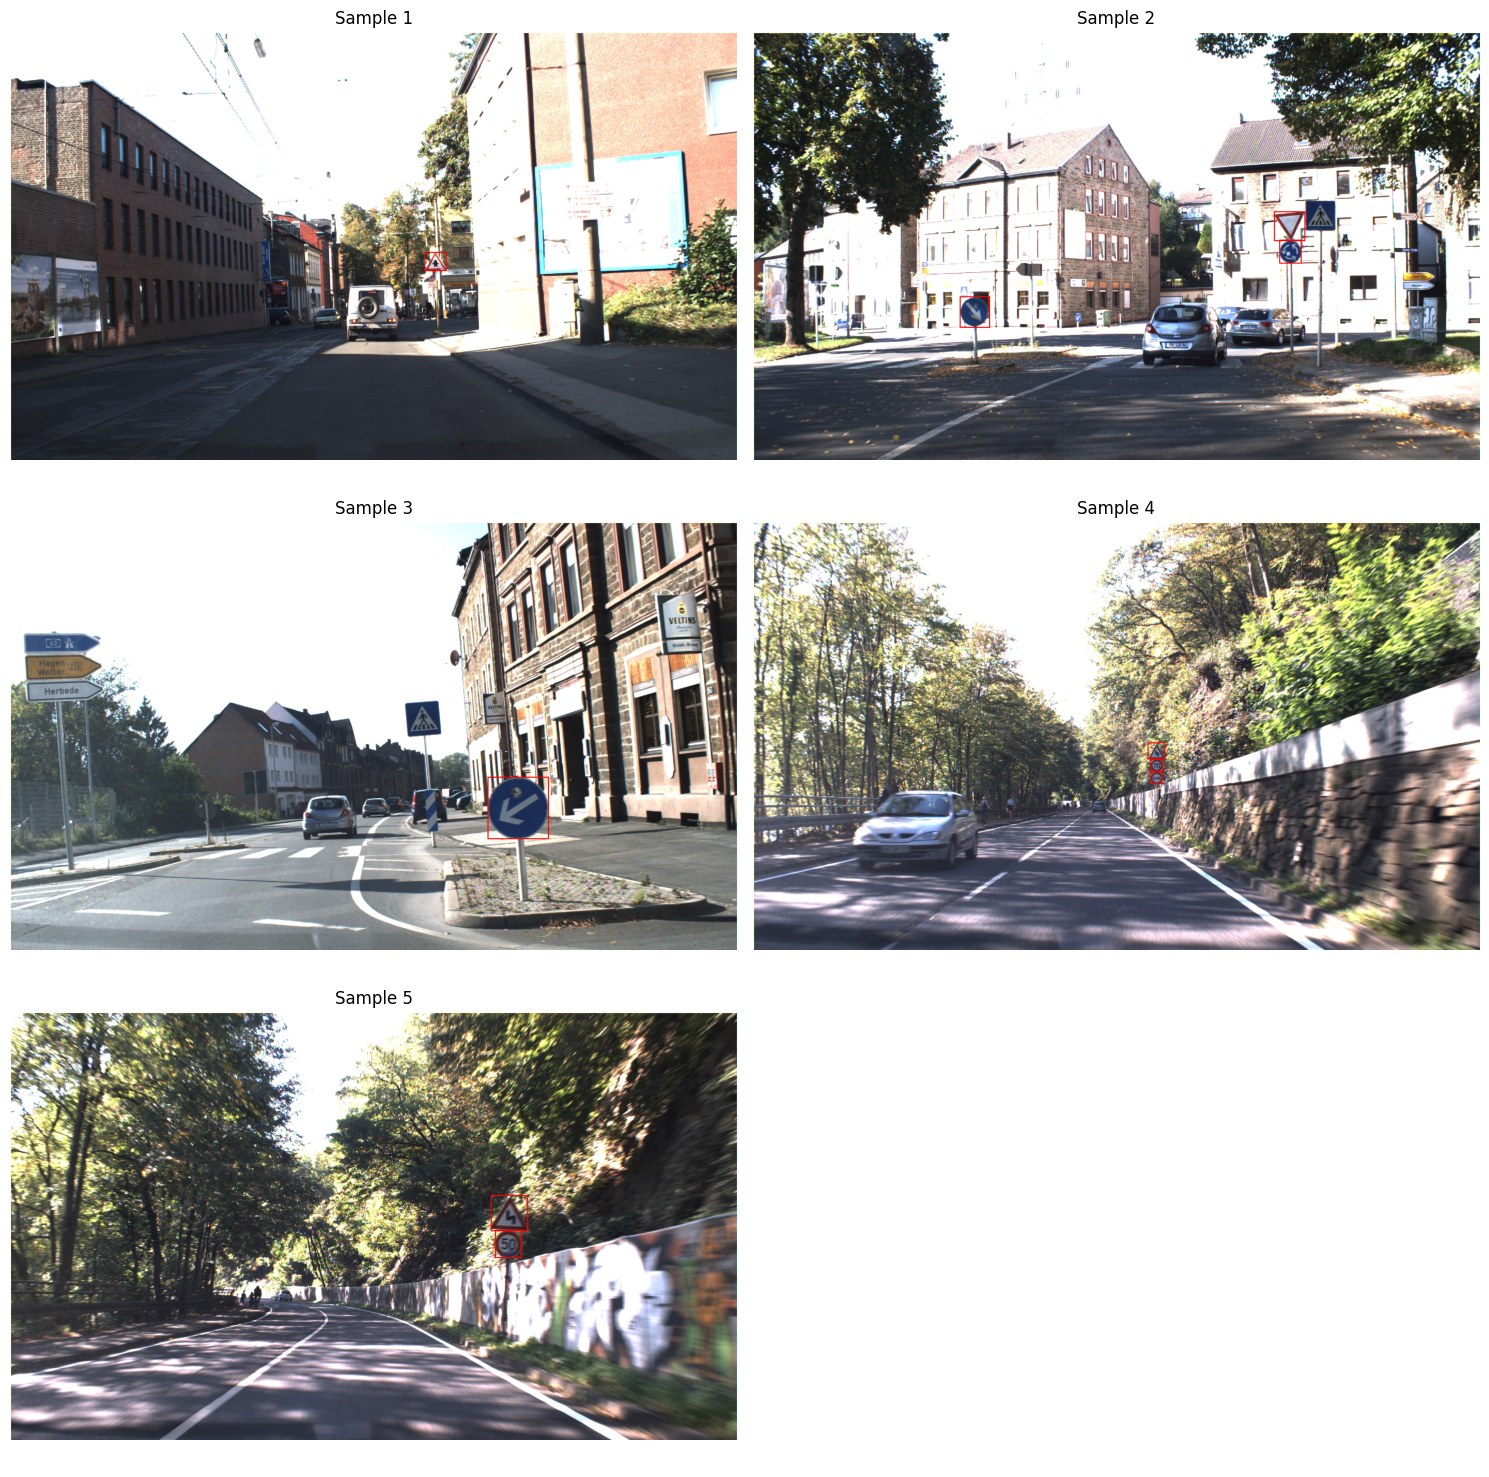

In [ ]:
import os
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

# Initialize annotation dictionary
annotations = {'boxes': [], 'labels': []}

# File paths
gt_file_path = '/content/dataset/gt.txt'
image_dir = "/content/dataset/TrainIJCNN2013/TrainIJCNN2013"

# Initialize lists for images and labels
images = []
true_labels = []

# Initialize variables for storing current image data
boxes = []
labels = []
current_image_name = ''

# Read annotation file
with open(gt_file_path, 'r') as f:
    for line in f:
        data = line.strip().split(';')
        filename = data[0]
        image_name = filename.split('.')[0]

        # Check if we are processing a new image
        if current_image_name != image_name:
            if current_image_name != '':  # Avoid appending on the first loop
                annotations['boxes'] = boxes
                annotations['labels'] = labels
                true_labels.append(annotations)

            # Reset for the new image
            current_image_name = image_name
            annotations = {'boxes': [], 'labels': []}
            boxes = []
            labels = []

            # Load image and add to the list
            image_path = os.path.join(image_dir, filename)
            try:
                image = Image.open(image_path)
                images.append(image)
            except Exception as e:
                print(f"Error loading image {image_path}: {e}")
                continue

        # Extract bounding box coordinates and labels
        box = [int(coord) for coord in data[1:5]]
        label = int(data[5])

        # Append box and label
        boxes.append(box)
        labels.append(label)

    # Add the last image annotations to true_labels
    if boxes and labels:
        annotations['boxes'] = boxes
        annotations['labels'] = labels
        true_labels.append(annotations)

# Function to display sample images with bounding boxes
def display_samples(images, annotations, num_samples=5):
    num_samples = min(num_samples, len(images))
    num_rows = (num_samples + 1) // 2
    fig, axes = plt.subplots(num_rows, 2, figsize=(15, num_rows * 5))
    axes = axes.flatten()

    for i in range(num_samples):
        image = images[i].copy()
        draw = ImageDraw.Draw(image)
        # Draw bounding boxes
        for box in annotations[i]['boxes']:
            draw.rectangle(box, outline="red", width=2)
        axes[i].imshow(image)
        axes[i].axis('off')
        axes[i].set_title(f"Sample {i + 1}")

    for j in range(num_samples, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

# Display sample images
display_samples(images, true_labels, num_samples=5)


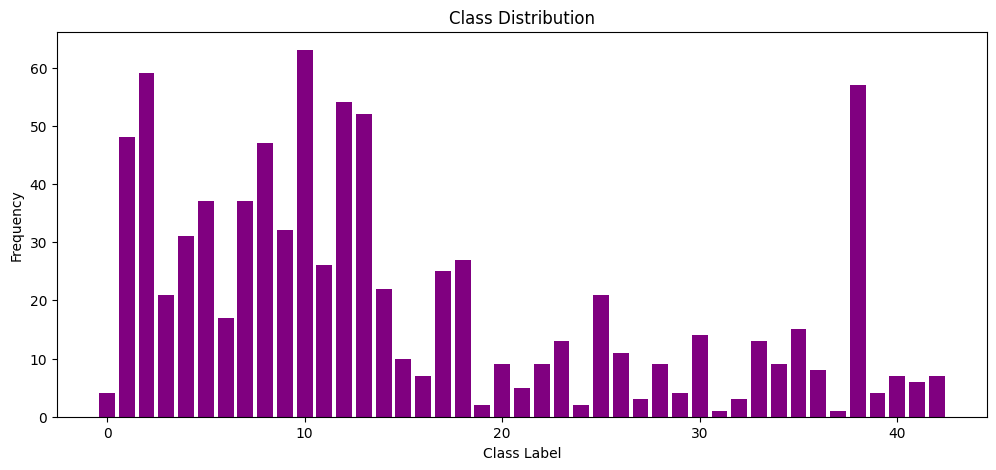

In [ ]:
# Class Distribution Analysis
all_labels = [label for entry in true_labels for label in entry['labels']]
label_counts = Counter(all_labels)
plt.figure(figsize=(12, 5))
plt.bar(label_counts.keys(), label_counts.values(), color='purple')
plt.title("Class Distribution")
plt.xlabel("Class Label")
plt.ylabel("Frequency")
plt.show()

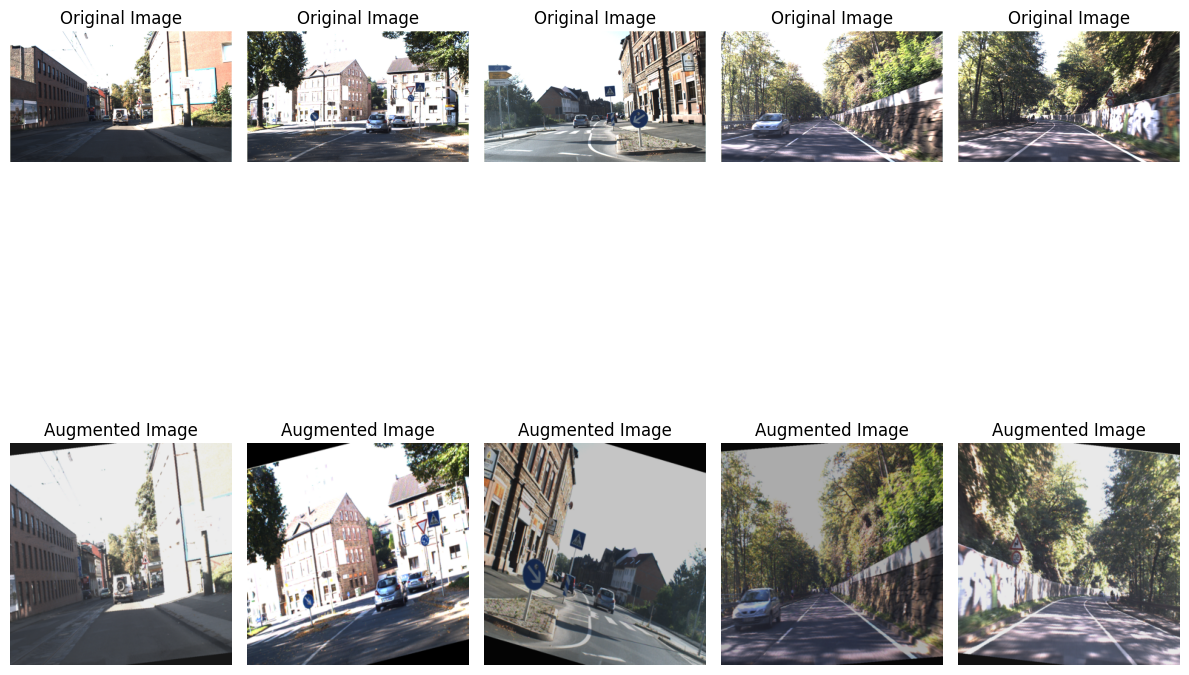

In [ ]:
from torchvision import transforms as tfms

# Augmentation sequence
augment_pipeline = tfms.Compose([
    tfms.RandomHorizontalFlip(0.5),
    tfms.RandomRotation(15),
    tfms.ColorJitter(brightness=0.3, contrast=0.3, saturation=0.3),
    tfms.RandomResizedCrop(300, scale=(0.8, 1.0))
])

# Function to show augmented samples
def show_augmented_images(samples=5):
    figure, axs = plt.subplots(2, samples, figsize=(13, 12))
    for idx in range(samples):
        # Pick an image
        img = images[idx]
        # Apply augmentations
        transformed_img = augment_pipeline(img)

        # Display original
        axs[0, idx].imshow(img)
        axs[0, idx].set_title("Original Image")
        axs[0, idx].axis("off")

        # Display augmented
        axs[1, idx].imshow(transformed_img)
        axs[1, idx].set_title("Augmented Image")
        axs[1, idx].axis("off")

    plt.tight_layout()
    plt.show()

# Execute function
show_augmented_images()


In [ ]:
# Preparing the data, since the testing images do not have labels so i have divided the training images into 8:2 ratio

import pandas as pd
import numpy as np

# original images dimensions are also 1360,800
resized_images = [np.array(img.resize((1360, 800))) for img in images]
resized_labels = [label_data['labels'][0] for label_data in true_labels]

# Split dataset into training and validation sets
train_images, val_images, train_labels, val_labels = train_test_split( resized_images, resized_labels, test_size=0.2, random_state=42)


# Convert to numpy arrays
X_train = np.array(X_train)
X_val = np.array(X_val)
y_train = np.array(y_train)
y_val = np.array(y_val)

print(f"Training set size: {X_train.shape}, {y_train.shape}")
print(f"Validation set size: {X_val.shape}, {y_val.shape}")



Training set size: (404, 800, 1360, 3), (404,)
Validation set size: (102, 800, 1360, 3), (102,)


In [ ]:
from tensorflow.keras import layers, models

#CNN model architecture

def build_cnn_model(input_shape=(800, 1360, 3), num_classes=43):
    model = models.Sequential([
        # Convolutional layers
        layers.Conv2D(16, (3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(32, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        model.add(layers.Dropout(0.25))

        # # Second Convolutional Block
        # model.add(layers.Conv2D(64, (3, 3), activation='relu'))
        # model.add(layers.BatchNormalization())
        # model.add(layers.MaxPooling2D((2, 2)))
        # model.add(layers.Dropout(0.25))

        # Fully connected layers
        layers.GlobalAveragePooling2D(),
        layers.Dense(128, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])

    return model

# Instantiate and summarize the model
model = build_cnn_model()
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 798, 1358, 16)       │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 399, 679, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 397, 677, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 198, 338, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 32)                  │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │           4,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 43)                  │           5,547 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,859 (58.04 KB)

 Trainable params: 14,859 (58.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])
# Defining callbacks: EarlyStopping and ModelCheckpoint
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint(filepath='model.keras', save_best_only=True, monitor='val_loss')

# Training the model on the training data
history = model.fit(x=train_images, y=train_labels,  validation_data=(val_images, val_labels), epochs=5, callbacks=[early_stop, model_checkpoint])



Epoch 1/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 56s 3s/step - accuracy: 0.0388 - loss: 11.5095 - val_accuracy: 0.0686 - val_loss: 4.2674
Epoch 2/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 401ms/step - accuracy: 0.0640 - loss: 3.7420 - val_accuracy: 0.1176 - val_loss: 3.6254
Epoch 3/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 11s 421ms/step - accuracy: 0.1076 - loss: 3.6147 - val_accuracy: 0.0490 - val_loss: 3.6176
Epoch 4/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 406ms/step - accuracy: 0.0670 - loss: 3.5203 - val_accuracy: 0.0392 - val_loss: 3.6063
Epoch 5/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 429ms/step - accuracy: 0.0815 - loss: 3.5115 - val_accuracy: 0.0490 - val_loss: 3.5092


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 169ms/step
Classification Accuracy on Test Set: 0.049019607843137254


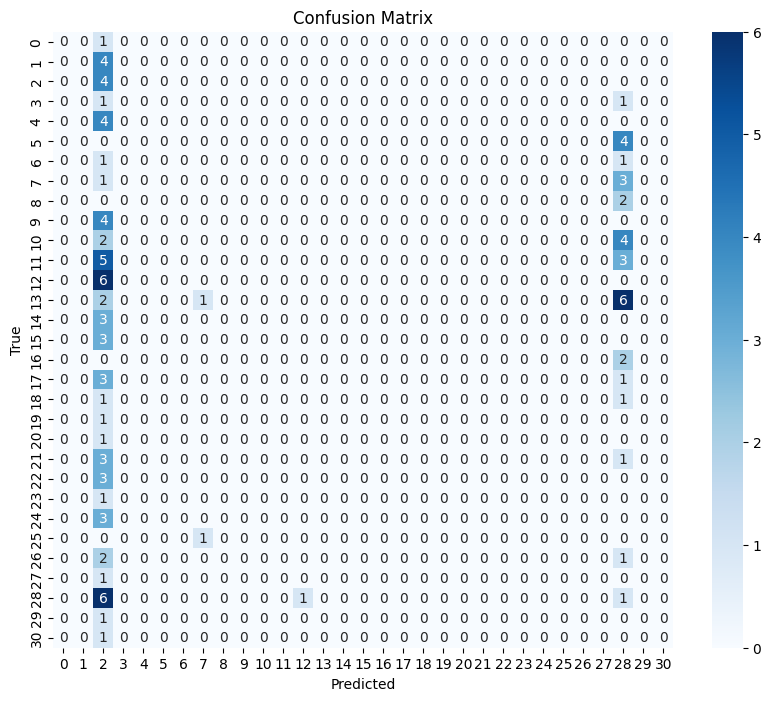

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Predict on the validation set
pred_labels = model.predict(val_images)
Confusion_matrixc = confusion_matrix(y_true=val_labels, y_pred=np.argmax(predicted_labels, axis=-1))
classification_accuracy = accuracy_score(val_labels, np.argmax(pred_labels, axis=1))
print(f"Classification Accuracy on Test Set: {classification_accuracy}")

plt.figure(figsize=(8, 6))
sns.heatmap(Confusion_matrixc, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()